In [2]:
from transformers import BertTokenizerFast, BertModel, BertForSequenceClassification
import matplotlib.pyplot as plt
import numpy as np
import torch

load model

In [3]:
ckpt_path = './checkpoints/'
# Paths to tokenizer files
tokenizer_files = {
    'vocab_file': ckpt_path+'vocab.txt',
    'tokenizer_file': ckpt_path+'tokenizer.json',
    'tokenizer_config_file': ckpt_path+'tokenizer_config.json',
    'special_tokens_map_file': ckpt_path+'special_tokens_map.json'
}
tokenizer = BertTokenizerFast(
    vocab_file=tokenizer_files['vocab_file'],
    tokenizer_file=tokenizer_files['tokenizer_file'],
    tokenizer_config=tokenizer_files['tokenizer_config_file'],
    special_tokens_map_file=tokenizer_files['special_tokens_map_file']
)



In [4]:
model = BertForSequenceClassification.from_pretrained(ckpt_path, num_labels=10)
model.eval()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./checkpoints/ and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

use inputs to do predictions

In [5]:
smiles = 'O=C([C@@H](c1ccc(cc1)O)N)N[C@@H]1C(=O)N2[C@@H]1SC([C@@H]2C(=O)O)(C)C'
tokens = tokenizer(smiles, return_tensors='pt')
predictions = model(**tokens)

visualization

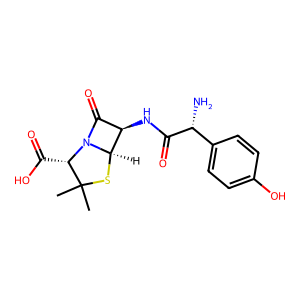

In [6]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Draw

# Convert the SMILES string to a molecule object
mol = Chem.MolFromSmiles(smiles)
save_file = 'input.png'
# Check if the molecule was parsed correctly
if mol is None:
    print("Failed to parse SMILES string.")
else:
    # Display the molecule inline (useful for Jupyter notebooks)
    from IPython.display import display
    display(Draw.MolToImage(mol, size=(300, 300)))

    # Alternatively, save the molecule as an image file
    Draw.MolToFile(mol, save_file, size=(300, 300))


In [8]:
to_plot = predictions.logits.detach().numpy()[0]

[ 0.34949332  0.6419289  -0.3734241   0.1450625  -0.19015944  0.52376837
 -0.22825107 -0.43746704  0.07822841 -0.5457467 ]


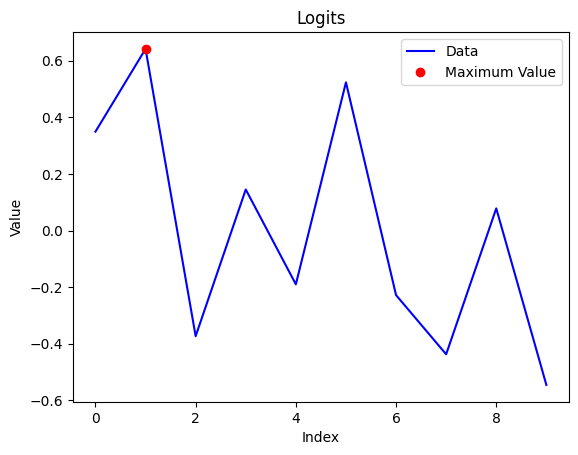

<Figure size 640x480 with 0 Axes>

In [9]:
pred_file = 'pred.png'
# Find the index and value of the maximum element
print(to_plot)
max_index = np.argmax(to_plot)
max_value = to_plot[max_index]

# Create an array of indices for the x-axis
indices = np.arange(len(to_plot))

# Plot the 1D array
plt.plot(indices, to_plot, color='blue', label='Data')

# Highlight the maximum value
plt.plot(max_index, max_value, 'ro', label='Maximum Value')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Logits')
plt.legend()

# Display the plot
plt.show()
plt.savefig(pred_file)